In [1]:
import pandas as pd
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [2]:
print("Train Data Shape: ", train.shape)
print("Test Data Shape: ", test.shape)

Train Data Shape:  (1460, 81)
Test Data Shape:  (1459, 80)


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
train.drop(train[(train['OverallQual'] < 4) & train['SalePrice'] > 200000].index, inplace = True)
train.drop(train[(train['OverallCond'] < 4) & train['SalePrice'] > 200000].index, inplace = True)
train.reset_index(drop=True, inplace=True)
print(train.shape)

(1460, 81)


mu before log transformation:  180921.19589041095
sigma before log transformation:  79415.29188606751


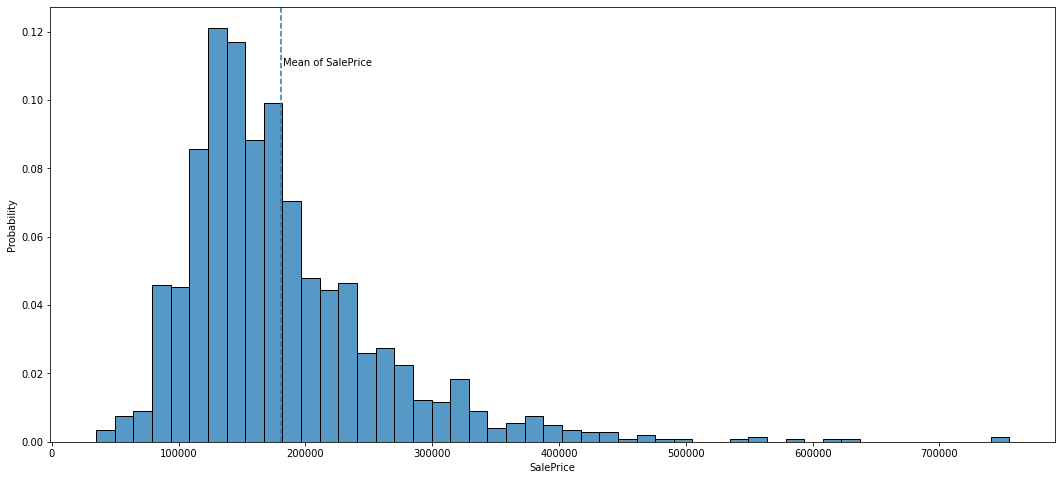

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

(mu, sigma) = norm.fit(train['SalePrice'])
print("mu before log transformation: ", mu)
print("sigma before log transformation: ", sigma)

fig, ax = plt.subplots(figsize = (18, 8))
sns.histplot(train['SalePrice'], stat = 'probability')

plt.axvline(mu, linestyle = '--')
plt.text(mu+1000, 0.11, 'Mean of SalePrice')
plt.show()

mu before log transformation:  12.024057394918406
sigma before log transformation:  0.39931245219387496


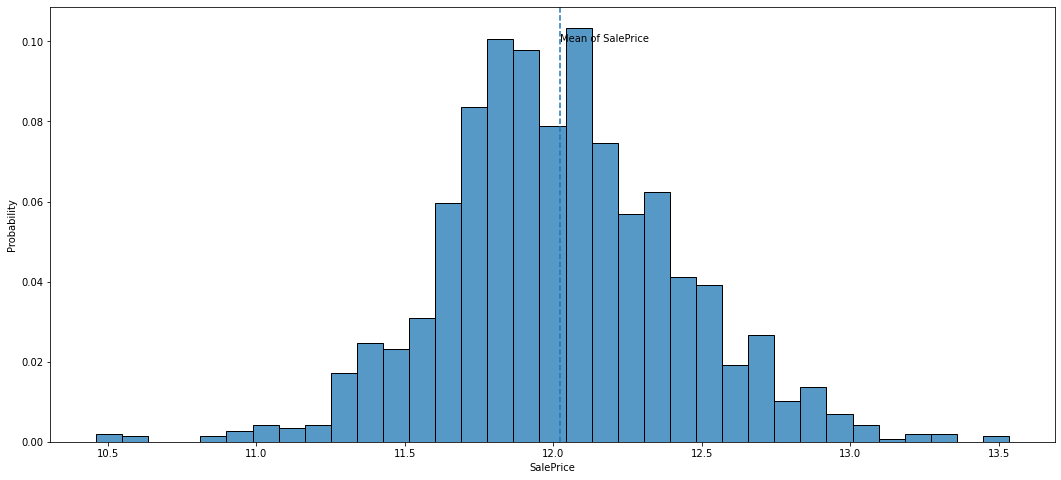

In [7]:
import numpy as np
train["SalePrice"] = np.log1p(train["SalePrice"])

(mu, sigma) = norm.fit(train['SalePrice'])
print("mu before log transformation: ", mu)
print("sigma before log transformation: ", sigma)

fig, ax = plt.subplots(figsize = (18, 8))
sns.histplot(train['SalePrice'], stat = 'probability')

plt.axvline(mu, linestyle = '--')
plt.text(mu+0.000005, 0.10, 'Mean of SalePrice')
plt.show()

In [8]:
train_id = train['Id']
test_id = test['Id']
train.drop(['Id'], axis = 1, inplace = True)
test.drop(['Id'], axis = 1, inplace = True)
print(train.shape, test.shape)

(1460, 80) (1459, 79)


In [12]:
sale_price = train['SalePrice']
train.drop(['SalePrice'], axis = 1, inplace = True)
print(train.shape, test.shape)

KeyError: 'SalePrice'

In [13]:
print(train.shape, test.shape)

(1460, 79) (1459, 79)


In [14]:
data = pd.concat([train, test]).reset_index(drop = True)
data.shape

(2919, 79)

In [16]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
def check_na(data, head_num = 6):
    isnull_na = (data.isnull().sum()/len(data))*100
    data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending = False)
    missing_data = pd.DataFrame({"Missing Ratio": data_na, 'Data Type': data.dtypes[data_na.index]})
    print(missing_data.head(head_num))

check_na(data, 20)

              Missing Ratio Data Type
PoolQC            99.657417    object
MiscFeature       96.402878    object
Alley             93.216855    object
Fence             80.438506    object
FireplaceQu       48.646797    object
LotFrontage       16.649538   float64
GarageFinish       5.447071    object
GarageQual         5.447071    object
GarageCond         5.447071    object
GarageYrBlt        5.447071   float64
GarageType         5.378554    object
BsmtExposure       2.809181    object
BsmtCond           2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
BsmtFullBath       0.068517   float64


In [22]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis = 1, inplace = True)
check_na(data, 20)

              Missing Ratio Data Type
GarageCond         5.447071    object
GarageQual         5.447071    object
GarageYrBlt        5.447071   float64
GarageFinish       5.447071    object
GarageType         5.378554    object
BsmtCond           2.809181    object
BsmtExposure       2.809181    object
BsmtQual           2.774923    object
BsmtFinType2       2.740665    object
BsmtFinType1       2.706406    object
MasVnrType         0.822199    object
MasVnrArea         0.787941   float64
MSZoning           0.137033    object
Functional         0.068517    object
Utilities          0.068517    object
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
GarageArea         0.034258   float64
GarageCars         0.034258   float64
TotalBsmtSF        0.034258   float64


In [23]:
cat_all_vars = train.select_dtypes(exclude=[np.number])
print(len(list(cat_all_vars)), len(list(train.select_dtypes([np.number]))))

43 36


In [25]:
data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [29]:
len(data.select_dtypes('object').columns)

38

In [39]:
obj_data = data.select_dtypes('object')
num_data = data.select_dtypes(np.number)
print(len(list(obj_data)), len(list(num_data)), len(list(obj_data))+ len(list(num_data)), len(list(data)))

38 35 73 73


In [45]:
f_obj_data = list(obj_data)

In [51]:
for i in f_obj_data:
    data[i] = data[i].fillna(data[i].mode()[0])

check_na(data, 20)

              Missing Ratio Data Type
GarageYrBlt        5.447071   float64
MasVnrArea         0.787941   float64
BsmtFullBath       0.068517   float64
BsmtHalfBath       0.068517   float64
BsmtFinSF1         0.034258   float64
BsmtFinSF2         0.034258   float64
BsmtUnfSF          0.034258   float64
TotalBsmtSF        0.034258   float64
GarageCars         0.034258   float64
GarageArea         0.034258   float64


In [54]:
for i in list(num_data):
    data[i] = data[i].fillna(data[i].median())

check_na(data, 20)

Empty DataFrame
Columns: [Missing Ratio, Data Type]
Index: []


In [57]:
from scipy.stats import skew

def find_skew(x):
    return skew(x)

skew_features = data[list(num_data)].apply(find_skew).sort_values(ascending=False)

print(skew_features)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425378
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162616
BsmtUnfSF         0.919703
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241184
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
GarageCars       -0.218593
GarageYrBlt      -0.398576
YearRemodAdd     -0.451020
YearBuilt        -0.599806
dtype: float64


In [65]:
data.select_dtypes(np.number).head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
5,50,14115,5,5,1993,1995,0.0,732.0,0.0,64.0,...,480.0,40,30,0,320,0,0,700,10,2009
6,20,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,636.0,255,57,0,0,0,0,0,8,2007
7,60,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,484.0,235,204,228,0,0,0,350,11,2009
8,50,6120,7,5,1931,1950,0.0,0.0,0.0,952.0,...,468.0,90,0,205,0,0,0,0,4,2008
9,190,7420,5,6,1939,1950,0.0,851.0,0.0,140.0,...,205.0,0,4,0,0,0,0,0,1,2008


In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax